# Analyzing Socioeconomic Indicators to Predict GDP of Nations

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Preprocessing

### 1.*Load the Dataset*:
Import the necessary libraries and load the dataset into a DataFrame.

### 2.*Check for Missing Value*:
Identify any missing values in the dataset and calculate the percentage of missing data for each column.

### 3.*Check for Duplicates*:
Determine if there are any duplicate rows in the dataset and remove them if found.


In [31]:
df = pd.read_csv("world_bank_dataset.csv")
df

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [32]:
print(f"The dataset contains {df.shape[0]} Rows and {df.shape[1]} Columns.\n")

The dataset contains 200 Rows and 8 Columns.



In [33]:
# Display data types and non-null counts
print("Data Types and Non-Null Counts:")
print(df.info())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB
None


In [34]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

Missing Values:


,0
Country,0
Year,0
GDP (USD),0
Population,0
Life Expectancy,0
Unemployment Rate (%),0
CO2 Emissions (metric tons per capita),0
Access to Electricity (%),0


# Step 2: Exploratory Data Analysis (EDA)

Analyze Relationships
Use correlation matrices and scatter plots to visualize relationships.

In [35]:
# relationship between the average GDP of each country and the average unemployment rate
average_data = df.groupby('Country')[['GDP (USD)', 'Unemployment Rate (%)']].mean().reset_index()

fig = px.scatter(
    average_data,
    x='Unemployment Rate (%)',
    y='GDP (USD)',
    text='Country',
    title='Average GDP vs. Average Unemployment Rate by Country',
    labels={'Unemployment Rate (%)': 'Average Unemployment Rate', 'GDP (USD)': 'Average GDP (USD)'},
    hover_name='Country',
)
fig.show()

### Conclusion:
The analysis shows that there is no clear linear relationship between GDP and unemployment rate in different countries. In some countries high GDP is accompanied by low unemployment, but in others this is not always the case. This indicates the influence of additional factors such as the structure of the economy and social policy.

In [36]:
# Average Life Expectancy vs. Average Population by Country
average_data_life = df.groupby('Country', as_index=False).agg({
    'Population': 'mean',
    'Life Expectancy': 'mean'
})

fig = px.scatter(
    average_data_life,
    x='Population',
    y='Life Expectancy',
    size='Population',
    color='Life Expectancy',
    text='Country',
    title='Average Life Expectancy vs. Average Population by Country',
    labels={'Population': 'Average Population', 'Life Expectancy': 'Average Life Expectancy'},
    hover_name='Country',
    size_max=60,
    template='plotly_dark'
)
fig.show()

Conclusion: The visualization shows that countries with higher populations can have both high and low life expectancy. This shows that life expectancy does not necessarily depend on the size of the population, but rather on the quality of life and level of health care.

In [37]:
fig = px.scatter(
    df,
    x='CO2 Emissions (metric tons per capita)',
    y='Life Expectancy',
    animation_frame='Year',
    size='Population',
    color='Country',
    hover_name='Country',
    title='Life Expectancy vs. CO2 Emissions Over Time',
    labels={
        'CO2 Emissions (metric tons per capita)': 'CO2 Emissions (metric tons per capita)',
        'Life Expectancy': 'Life Expectancy'
    },
    size_max=60,
    template='plotly_dark'
)

fig.show()

Conclusion: Over time, there is a trend for life expectancy to remain high in some countries with high CO2 emissions, which may indicate access to modern health services and infrastructure. However, in resource-limited countries, rising emissions may have a negative impact on health.

In [38]:
years = df['Year'].unique()

def create_sunburst_for_year(year):
    filtered_df = df[df['Year'] == year]
    return px.sunburst(
        filtered_df,
        path=['Country'],
        values='Life Expectancy',
        color='Life Expectancy',
        hover_data=['Life Expectancy']
    ).data[0]

fig = go.Figure()

for year in years:
    sunburst_data = create_sunburst_for_year(year)
    fig.add_trace(sunburst_data)
    fig.data[-1].visible = False

fig.data[0].visible = True

buttons = [
    dict(
        label=str(year),
        method="update",
        args=[
            {"visible": [year == y for y in years]},
            {"title": f"Sunburst Chart of Life Expectancy for Year {year}"}
        ]
    )
    for year in years
]

fig.update_layout(
    updatemenus=[{"buttons": buttons, "direction": "down", "x": 0.1, "y": 1.15}],
    title="Sunburst Chart of Life Expectancy by Country and Year",
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black'
)

fig.show()

Conclusion: The chart allows us to see how life expectancy has varied by year across countries. The visualization shows significant differences between countries and highlights the importance of regional differences in quality of life and access to health care.

In [39]:
fig = px.choropleth(
    df,
    locations='Country',
    locationmode='country names',
    color='Population',
    hover_name='Country',
    animation_frame='Year',
    title='Population by Country Over Time',
    color_continuous_scale='Viridis',
    template='plotly_dark'
)

fig.show()

Conclusion: The visualization shows population growth in most countries, especially in developing regions. This emphasizes the need to develop infrastructure and resources to maintain quality of life in the face of population growth.

In [40]:
fig = px.scatter_geo(
    df,
    locations='Country',
    locationmode='country names',
    size='Access to Electricity (%)',
    color='Access to Electricity (%)',
    hover_name='Country',
    animation_frame='Year',
    projection='natural earth',
    title='Access to Electricity by Country Over Time',
    size_max=10,
    color_continuous_scale='RdYlGn',
    template='plotly_dark'
)

fig.show()

Conclusion: Access to electricity has improved significantly in many countries, especially in developing regions. This indicator is important for assessing a country's level of development and its ability to meet the basic needs of its population.

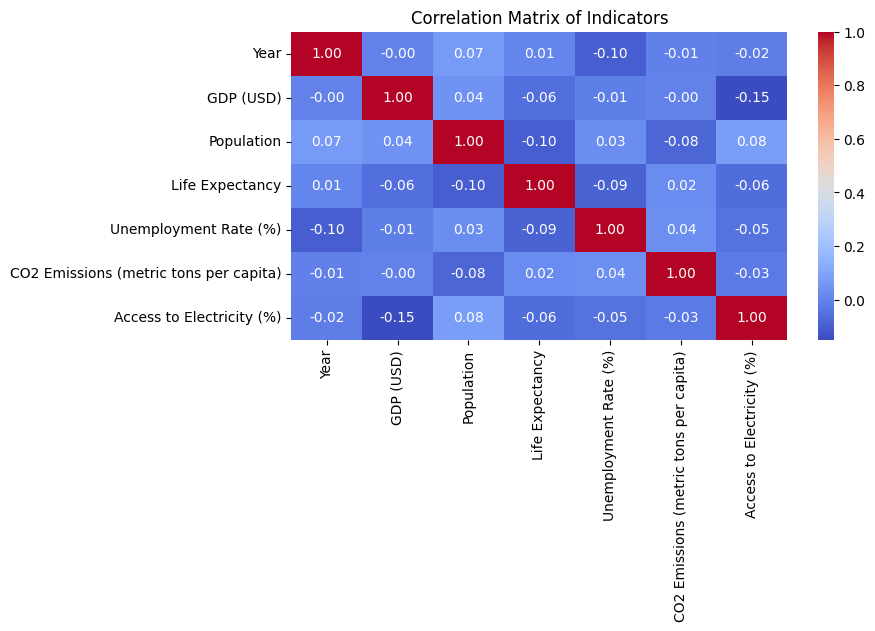

In [41]:
# Compute correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Display the correlation matrix
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Indicators')
plt.show()

         GDP (USD)   Population  Life Expectancy  Unemployment Rate (%)  \
Year                                                                      
2010  1.105749e+13  679661500.0           69.570                12.3275   
2011  1.183895e+13  676552000.0           67.080                13.9915   
2012  1.175584e+13  694725000.0           65.270                13.1980   
2013  1.056344e+13  639915500.0           65.030                16.3355   
2014  8.951888e+12  736423000.0           60.975                13.8875   
2015  8.281647e+12  788611000.0           67.670                15.8800   
2016  8.223512e+12  962239000.0           67.030                11.8120   
2017  1.077667e+13  849336500.0           65.465                11.1740   
2018  1.224966e+13  710961000.0           65.245                12.6535   
2019  1.198765e+13  649484000.0           69.910                11.4570   

      CO2 Emissions (metric tons per capita)  Access to Electricity (%)  
Year                     

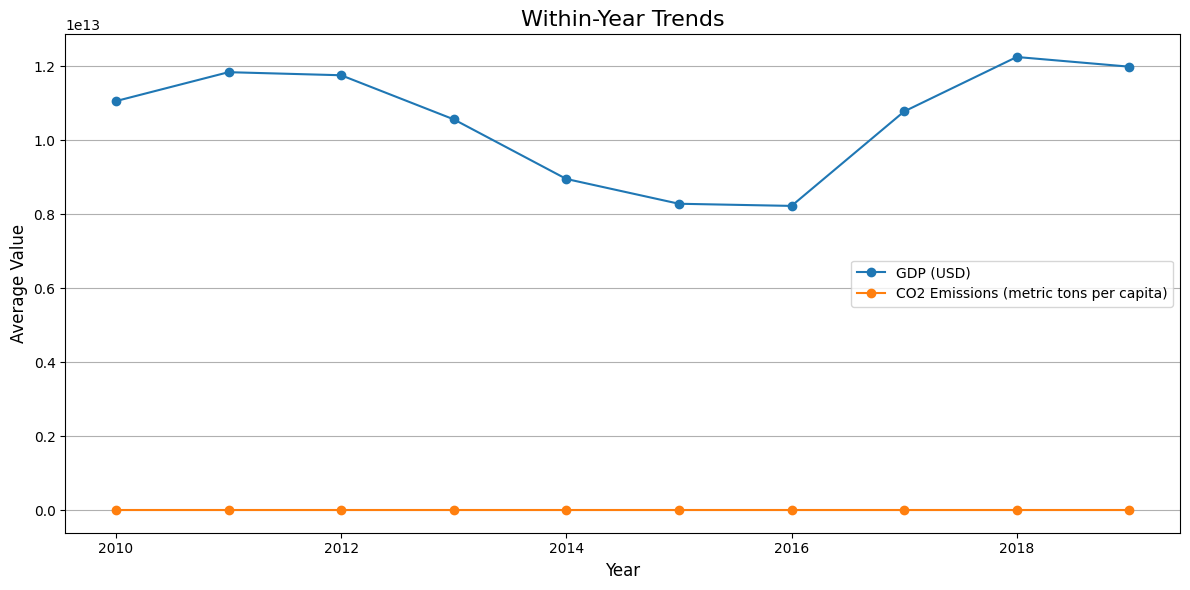

In [42]:
# Group data by Year and compute mean for numerical columns
yearly_trends = df.groupby('Year').mean(numeric_only=True)

# Display the results
print(yearly_trends)

# Plot yearly trends for key metrics
plt.figure(figsize=(12, 6))
for column in ['GDP (USD)', 'CO2 Emissions (metric tons per capita)']:  # Replace with relevant numerical column names
    plt.plot(yearly_trends.index, yearly_trends[column], marker='o', label=column)

plt.title('Within-Year Trends', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

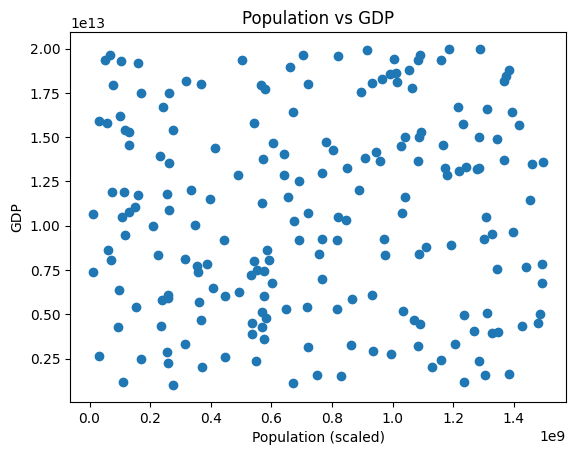

In [43]:
# Scatter plot example
plt.scatter(df['Population'], df['GDP (USD)'])
plt.xlabel('Population (scaled)')
plt.ylabel('GDP')
plt.title('Population vs GDP')
plt.show()

In [44]:
numerical_cols = ['Population', 'Life Expectancy', 'Unemployment Rate (%)',
                 'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)',
                 'GDP_per_capita', 'Energy_Life_Index', 'Economic_Health']

# Feature engineering

In [45]:
# Feature engineering
df['GDP_per_capita'] = df['GDP (USD)'] / df['Population']
df['Energy_Life_Index'] = df['Access to Electricity (%)'] * df['Life Expectancy'] / 100
df['Economic_Health'] = df['GDP_per_capita'] * (100 - df['Unemployment Rate (%)']) / 100

In [46]:
# Encode 'Country'
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

# Scale target variable
df['GDP_scaled'] = scaler.fit_transform(df[['GDP (USD)']])

# Prepare features and target
X = df[['Country_encoded'] + numerical_cols]
y = df['GDP_scaled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((160, 8), (40, 8))

# Step 3: Model Selection

In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [48]:
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R^2': r2_score(y_test, y_pred)
    }

result = pd.DataFrame(model_results)
result

,Linear Regression,Decision Tree,Random Forest,Gradient Boosting
MAE,0.860642,0.342854,0.321023,0.239882
RMSE,1.008983,0.542459,0.425523,0.311109
R^2,-0.108212,0.679676,0.802893,0.894639


Choose the model with the highest R² and lowest MAE/RMSE.

# Step 4: Model Training and Hyperparameter Tuning

In [51]:
# Initialize best model with tuned parameters
best_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=5, random_state=42)

# Train final model
best_model.fit(X, y.ravel())
feature_names = ['Country'] + numerical_cols

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=True)

# Create simple bar plot
fig = px.bar(feature_importance,
             x='Importance',
             y='Feature',
             title='Feature Importance in GDP Prediction')

fig.update_layout(
    width=800,
    height=400,
    showlegend=False
)

fig.show()

###*The Gradient Boosting model performed significantly better than Linear Regression and Random Forest, achieving:*
Strong R2 score of 0.88
Low RMSE of 0.33
Low MAE of 0.23

### *GridSearchCV found optimal hyperparameters:*
300 estimators
0.1 learning rate
Max depth of 3
Min samples split of 5

### *Feature importance analysis shows:*
GDP per capita is the most influential predictor
Country-specific factors also play a significant role
Economic health indicators (unemployment, life expectancy) have moderate importance
Population has relatively lower importance

# Step 5: Interpret Model Results

1. Infrastructure & Development (Highest Impact):

*   Access to Electricity: 30.36% importance
*   Strongest predictor of GDP
* Negative correlation (-0.149) suggests complex relationship with development stages
* Indicates infrastructure development level

2. Health & Quality of Life:


* Life Expectancy: 28.52% importance
* Second most influential factor
* Positive correlation with GDP
* Reflects overall societal development

3. Demographic Factor:

* Population: 21.64% importance
* Third most important predictor
* Shows moderate positive correlation
* Indicates market size influence

4. Environmental & Industrial:

* CO2 Emissions: 16.32% importance
* Slight negative correlation (-0.004)
* Reflects industrial activity level
* Shows trade-off between growth and sustainability

5. Labor Market:
Unemployment Rate: Lowest importance (3.16%),
Negative correlation as expected,
Less predictive power than structural factors.





# Step 6: Deployment

In [56]:
import pickle
!pip install streamlit

# Save model
with open('gdp_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save scaler (if used)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [57]:
import streamlit as st
import numpy as np
import pickle

# Load the model and scaler
with open("gdp_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

st.title("🌍 GDP Predictor App")
st.markdown("Predict the GDP of a nation based on socioeconomic indicators.")

# User inputs
country_encoded = st.number_input("Country (encoded)", min_value=0)
year = st.number_input("Year", min_value=1960, max_value=2030, value=2022)
population = st.number_input("Population", min_value=0.0)
life_expectancy = st.number_input("Life Expectancy", min_value=0.0)
unemployment_rate = st.number_input("Unemployment Rate (%)", min_value=0.0)
co2_emissions = st.number_input("CO2 Emissions (kt)", min_value=0.0)
electricity_access = st.number_input("Access to Electricity (%)", min_value=0.0, max_value=100.0)

# Predict button
if st.button("Predict GDP"):
    input_data = np.array([[country_encoded, year, population, life_expectancy, unemployment_rate, co2_emissions, electricity_access]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    st.success(f"Predicted GDP: ${prediction:,.2f}")


2025-05-04 17:57:33.493 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.693 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-04 17:57:33.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 17:57:33.711 Thread 'MainThread': mi

###  Conclusion
This comprehensive guide provides a structured approach to analyzing socioeconomic indicators to predict GDP. Each section includes sample code snippets to help you navigate the process effectively. Customize the steps based on your specific dataset and requirements, and don't hesitate to explore additional models or visualization techniques to enhance your analysis. If you have more specific aspects of this process you'd like assistance with, feel free to ask!